# NLP (Natural Language Processing) with Python

In [1]:
import nltk # Imports the library
nltk.download_shell() #Download the necessary datasets

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

        C:\Users\Cornelis\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
import pandas as pd

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

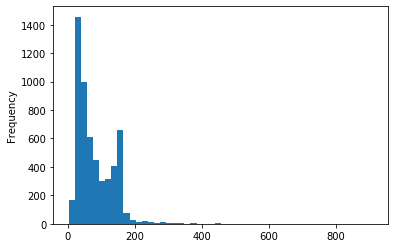

In [12]:
messages['length'].plot(bins=50, kind='hist') 

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [24]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [35]:
messages['Jumlah Kata'] = messages['message'].apply(lambda x: len(x.split()))
messages.head()

,label,message,length,Jumlah Kata
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027287836390>,
      dtype=object)

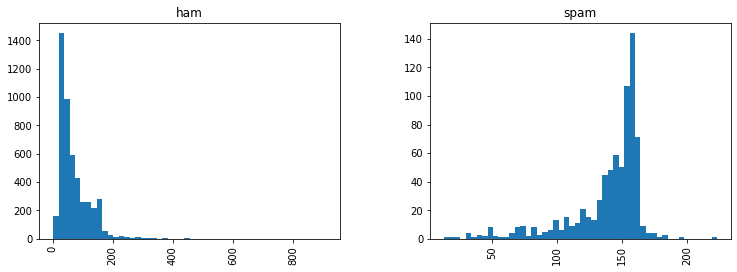

In [27]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

## Text Pre-processing

In [36]:
import string

mess = 'Sample message! Notice: it has punctuation.'

print(string.punctuation)
# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]
print(nopunc)
# Join the characters again to form the string.
nopunc = ''.join(nopunc)
print(nopunc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']
Sample message Notice it has punctuation


Now let's see how to remove stopwords. We can impot a list of english stopwords from NLTK (check the documentation for more languages and info).

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [57]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [58]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [59]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [60]:
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))
stop.extend(['dun','u','n','oni','wif'])
print(stop[-10:])

['werent', 'won', 'wont', 'wouldn', 'wouldnt', 'dun', 'u', 'n', 'oni', 'wif']


In [61]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [62]:
messages.head()

,label,message,length,Jumlah Kata
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [65]:
# Check to make sure its working
messages['message'].head(20).apply(text_process)

0     [Go, jurong, point, crazy, Available, bugis, n...
1                        [Ok, lar, Joking, wif, u, oni]
2     [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3         [U, dun, say, early, hor, U, c, already, say]
4     [Nah, dont, think, goes, usf, lives, around, t...
5     [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6     [Even, brother, like, speak, treat, like, aids...
7     [per, request, Melle, Melle, Oru, Minnaminungi...
8     [WINNER, valued, network, customer, selected, ...
9     [mobile, 11, months, U, R, entitled, Update, l...
10    [Im, gonna, home, soon, dont, want, talk, stuf...
11    [SIX, chances, win, CASH, 100, 20000, pounds, ...
12    [URGENT, 1, week, FREE, membership, £100000, P...
13    [Ive, searching, right, words, thank, breather...
14                                       [DATE, SUNDAY]
15    [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                  [Oh, kim, watching]
17    [Eh, u, remember, 2, spell, name, Yes, v, 

In [66]:
# Show original dataframe
messages.head()

,label,message,length,Jumlah Kata
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


## Vectorization

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [69]:
bow_transformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [76]:
bow_transformer.get_feature_names()

['0',
 '008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796XXXXXX',
 '07973788240',
 '07XXXXXXXXX',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084528

In [77]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [78]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [80]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[4629])
print(bow_transformer.get_feature_names()[5261])
print(bow_transformer.get_feature_names()[6204])
print(bow_transformer.get_feature_names()[6222])
print(bow_transformer.get_feature_names()[7186])
print(bow_transformer.get_feature_names()[9554])

U
already
c
dun
early
hor
say


In [81]:
messages_bow = bow_transformer.transform(messages['message'])

In [83]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [85]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity,2)))

sparsity: 0.08


In [86]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [101]:
tfidf4

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [88]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['c']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

5.775541185859478
8.527076498901426


In [89]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)
print(messages_tfidf)

(5572, 11425)
  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 

# Feature Reduction

In [90]:
from sklearn.decomposition import TruncatedSVD

In [91]:
lsa = TruncatedSVD(n_components =100)

In [92]:
message_lsa =pd.DataFrame(lsa.fit_transform(messages_tfidf))

In [93]:
message_lsa.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.035737,-0.044130,-0.019751,-0.019850,0.020006,-0.018356,0.040974,-0.025754,0.013219,0.000764,...,-0.030823,-0.028178,0.050125,0.002134,-0.072863,0.028174,-0.004063,-0.034042,-0.046642,0.047727
1,0.126351,-0.233476,0.186029,0.126799,-0.022561,0.045883,-0.039239,0.014304,-0.005529,0.022888,...,0.000084,-0.005423,0.018655,-0.022145,0.022421,0.001653,0.012846,0.010081,-0.021777,0.023596
2,0.022455,-0.024519,-0.019253,0.001718,0.042350,-0.064286,-0.006587,-0.000340,-0.017408,-0.011044,...,0.024997,0.057523,-0.041900,0.074102,-0.024842,-0.015958,-0.055509,-0.041208,-0.027822,-0.004815
3,0.069058,-0.086939,-0.050065,-0.007243,0.141593,-0.171326,0.063476,-0.074126,0.002821,-0.054451,...,0.083452,0.059188,0.001676,-0.069857,-0.018817,-0.049458,-0.063646,0.039841,0.076027,-0.006590
4,0.037554,-0.034185,-0.032072,-0.072333,-0.092723,-0.021400,-0.026652,-0.027377,0.014822,-0.061141,...,-0.008738,-0.012380,-0.003121,0.015891,0.024043,0.005655,-0.017111,0.019551,0.015236,-0.042883


## Training a model

In [94]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [95]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


## Model Evaluation

In [37]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [38]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [39]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## Creating a Data Pipeline

In [40]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001DABC1ECEA0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [42]:
predictions = pipeline.predict(msg_test)

In [43]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1006
       spam       0.72      1.00      0.84       109

avg / total       0.97      0.96      0.96      1115

